In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
wh_gdgi = pd.read_csv('wh_gd_gi_final.csv')

### World Happiness / Gender Development

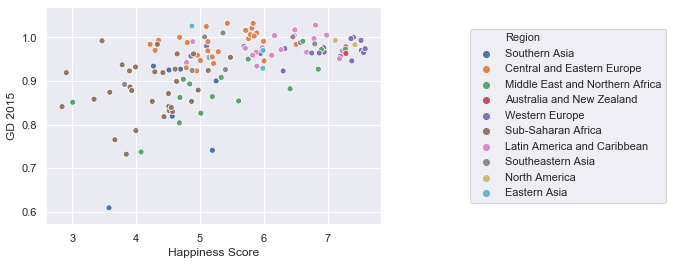

In [3]:
gd = sns.scatterplot(x='Happiness Score',y='GD 2015', data=wh_gdgi, hue='Region')
gd.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

### World Happiness / Gender Inequality

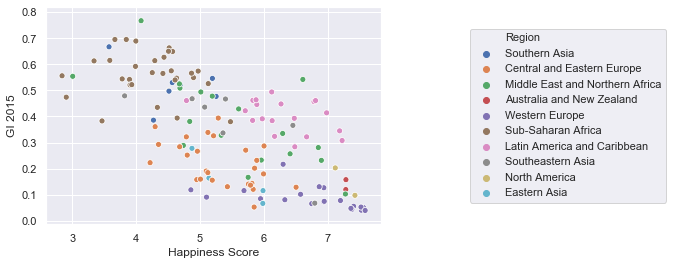

In [4]:
gi = sns.scatterplot(x='Happiness Score',y='GI 2015', data=wh_gdgi, hue='Region')
gi.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()